## Data loading - MRCD - Praveen
Source: https://github.com/praveenkumarchandaliya/ChildGAN_Tamp1

Make suitable for ArcFace and MagFace (112x112) and FaceNet (160x160)

### Data folder structure and metadata


In [25]:
# Load packages

# Common
import numpy as np
import os
import cv2 
import pandas as pd
from IPython.display import clear_output as cls
import matplotlib.pyplot as plt

# Data 
from glob import glob

# Data Visuaalization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Model



### Descriptive analysis - based on metadata

In [7]:
## Create dataframe 

# Define the path to the raw data directory
raw_data_path = '../data/raw/'

# Initialize lists to store image characteristics
img_names = []
ethnicities = []
genders = []
ages = []

# Iterate through the directories of each ethnicity (e.g., 'Asian')
ethnicities_list = os.listdir(raw_data_path + 'MRCD/')
for ethnicity in ethnicities_list:
    ethnicity_dir = os.path.join(raw_data_path + 'MRCD/', ethnicity)
    if os.path.isdir(ethnicity_dir):
        # Iterate through image files in the ethnicity directory
        for img_name in os.listdir(ethnicity_dir):
            # Extract gender and age from image name
            img_components = img_name.split('_')
            age = img_components[0]
            gender = img_components[1]
            
            # Append image characteristics to lists
            img_names.append(img_name)
            ethnicities.append(ethnicity)
            genders.append(gender)
            ages.append(age)

# Create a DataFrame from the lists
data = {'img_name': img_names, 'ethnicity': ethnicities, 'gender': genders, 'age': ages}
df = pd.DataFrame(data)

# Display the DataFrame
df.head()


,img_name,ethnicity,gender,age
0,1_0_3_20161219225654600.jpg,Indian,0,1
1,2_0_indian_81265wild.png,Indian,0,2
2,3_0_indian_81490wild.png,Indian,0,3
3,1_0_indian_81024wild.png,Indian,0,1
4,0_0_indian_81468wild.png,Indian,0,0


In [9]:
## Check DF quality
df

,img_name,ethnicity,gender,age
0,1_0_3_20161219225654600.jpg,Indian,0,1
1,2_0_indian_81265wild.png,Indian,0,2
2,3_0_indian_81490wild.png,Indian,0,3
3,1_0_indian_81024wild.png,Indian,0,1
4,0_0_indian_81468wild.png,Indian,0,0
5,1_1_3_20161220220219634.jpg,Indian,1,1
6,2_1_3_20161219230338336.jpg,Indian,1,2
7,1_1_3_20161220143213583.jpg,Indian,1,1
8,2_1_indian_81006wild.png,Indian,1,2
9,0_0_201882541.jpg,Indian,0,0


### Image data quality etc.

In [14]:
img_path[0]

'4_0_asian_7671833wild.png'

In [12]:
img_path = os.listdir(raw_data_path + 'MRCD/'+'Asian')
img = cv.imread(img_path[0])

[ WARN:0@1010.164] global loadsave.cpp:248 findDecoder imread_('4_0_asian_7671833wild.png'): can't open/read file: check file path/integrity


In [23]:
img_dir[0]

'4_0_asian_7671833wild.png'

img size:  (128, 128)


NameError: name 'output_size' is not defined

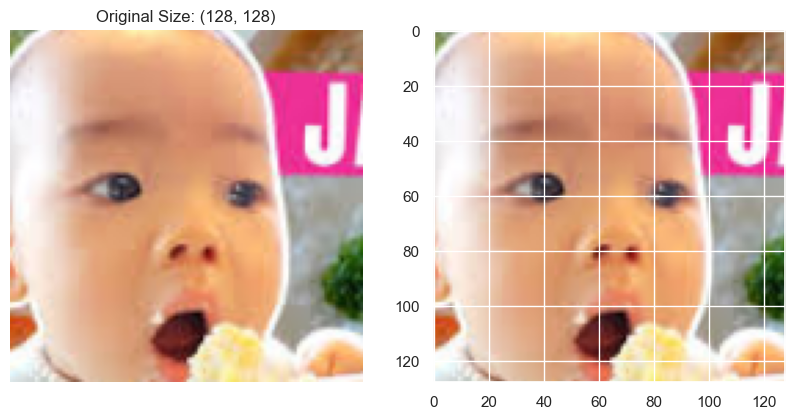

In [26]:
# Read the image
img_dir = os.listdir(raw_data_path + 'MRCD/'+'Asian')
#for filename in img_dir:
img_path = os.path.join(raw_data_path + 'MRCD/'+'Asian', img_dir[0]) #filename  # Full path to the image
#print(filename)
img = cv2.imread(img_path)
if img is not None:
    # Get original image size
    original_size = img.shape[:2]
    print("img size: ",original_size)
    
# Resize the image
img_resized = cv2.resize(img, (128,128))

# Display original and resized images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axes[0].set_title(f'Original Size: {original_size}')
axes[0].axis('off')
axes[1].imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))
axes[1].set_title(f'Resized to {output_size}')
axes[1].axis('off')
plt.show()

